In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open(r"C:\Users\Karthik\Documents\Python_for_Machine_Learning_&_Data_Science_Masterclass\DATA\Ames_Housing_Feature_Description.txt") as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
df = pd.read_csv(r"C:\Users\Karthik\Documents\Python Scripts\DATA\Ames_outliers_removed.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [5]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
# So PID is not of any use to us since we already have index so we can drop it
df.drop('PID',axis=1,inplace=True)
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
len(df.columns)

80

# Dealing with missing Data

# 1. Dealing with Missing Data : Part One -Evaluation of Missing Data

In [13]:
df.isnull().sum() 

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [15]:
### But it would be helpful if we can in all columns what percentage of data is missing
df.isnull().sum() / len(df) * 100

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [16]:
# For example we are missing 16.74% of Lot Frontage column

In [17]:
# We can aslo create a func for getting the missing percentage of values
# We can use this in future

def percent_missing(df):
    percent_nan = df.isnull().sum() / len(df) * 100
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

###  So what the above func does is it takes in a dataframe, counts the percentage of data missing of only those cols that actually have missing data and then sorts them so that we get a clearer idea.

In [29]:
percent_nan = percent_missing(df)
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

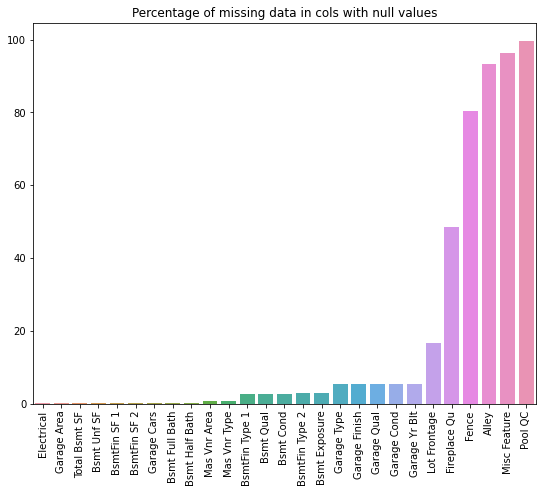

In [33]:
# We can aslo plot the above
plt.figure(figsize=(9,7))
sns.barplot(y=percent_nan.values, x=percent_nan.index)
plt.title('Percentage of missing data in cols with null values')
plt.xticks(rotation=90);

Now we can visually see which features in our dataset are misiing how much percentage of the total data

# Note - While dropping missing/null values you have to think about 2 steps
1. By rows- For data column/features having less percentage of missing data We can think about dropping the particluar rows or changing the values of thos every few rows with some data.

2. By columns - For things like very high percentage of information missing, we want to start thinking about it base dof the column, i.e. If we should directly drop off the entire column/feature or be a bit clever and fill in those missing values.

# 2. Dealing with Missing Data : Part Two -Filling or Dropping data based on Rows


So when we are dealing with missing data we have few options:-
1. Drop the rows having only 1% of missing data in them. It should be noted that dropping 1% of rows from the data is ok but if the percentage is higher than that then we might want to consider filling values in those 

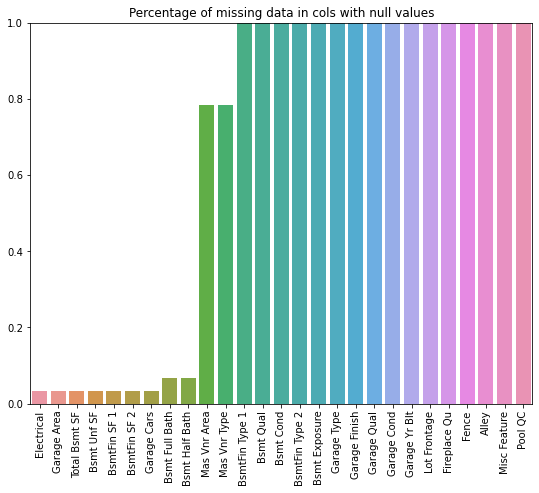

In [36]:
# We can aslo plot the above
plt.figure(figsize=(9,7))
sns.barplot(y=percent_nan.values, x=percent_nan.index)
plt.title('Percentage of missing data in cols with null values')
plt.xticks(rotation=90)
plt.ylim(0,1); # setting the y axis only upto 1% to see the features missing only 1% of the data 

#### Now we'll see the data about the features missing data less than only 1% of the data

In [37]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

The number here are essentially telling us 

In [39]:
print('percentage of 1 row in the dataset is:- ',1/len(df) * 100)

percentage of 1 row in the dataset is:-  0.0341646737273659


#### Hence we can see that  0.034165 is just one row of the entire dataset, which we can drop and it won't have much effect

In [40]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [41]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

In [42]:
# So it looks like only Elictrical feature of this row is missing

In [43]:
# Let's check for Bsmt Half Bath
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


### So now we have looked at information or rows having data less than 1% are only one rows and in this case dropping them or fillinng them both are valid choices.

In [44]:
df.dropna(axis=0,subset=['Electrical','Garage Area'],inplace=True)

In [45]:
# Now we can recalculate the percent_nan to check the percentages again.
percent_nan = percent_missing(df)

In [46]:
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

What we can see is that earlier we had 8 features with 1 row missing, But now after dropping 2 rows we have only 4 features with 1 row missing

We can see that after dropping the data we were also able to drop in a few additional features rows too

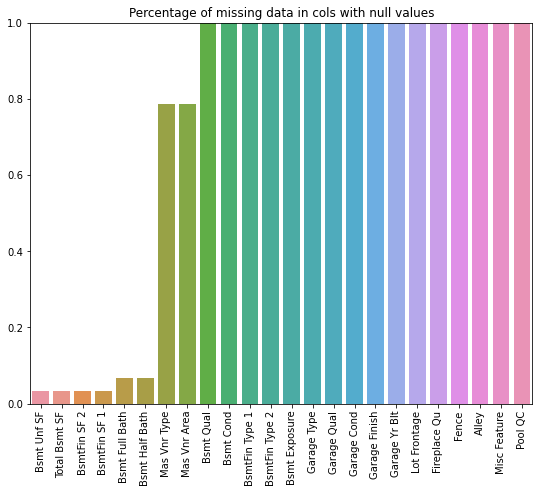

In [48]:
# Let's visualize it
plt.figure(figsize=(9,7))
sns.barplot(y=percent_nan.values, x=percent_nan.index)
plt.title('Percentage of missing data in cols with null values')
plt.xticks(rotation=90)
plt.ylim(0,1); # setting the y axis only upto 1% to see the features missing only 1% of the data 

In [49]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [50]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


### So in this case we can see that both these rows are samefo r both features with having null values

In [51]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


Again we see that there are basemnt features and they are null.

also from the description document we saw that thesw data can be absent meaaning maybe those houses did not have the basement features. Therefore, instead of dropping them we can make them zero, since they are numerical columns.

In [52]:
# BSMT numeric  columns --> we will fill them as 0
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# BSMT String columns --> we will fill them as None
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [53]:
# Now we can check if the null value worked
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [56]:
# We can allso check for the String columns
df[df['Bsmt Qual'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [57]:
# Now we will again see the missing percentage data
percent_nan = percent_missing(df)
percent_nan

Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

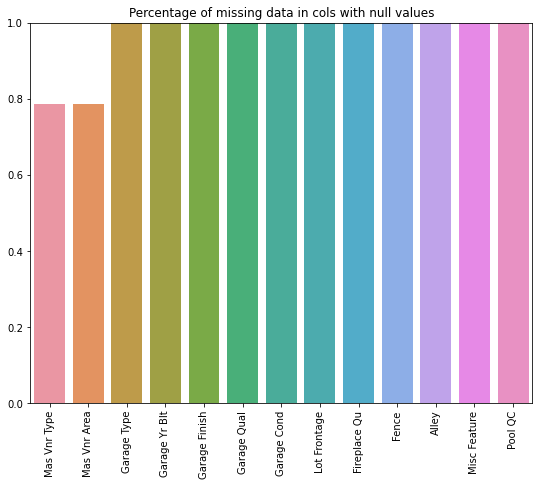

In [58]:
# Let's visualize it
plt.figure(figsize=(9,7))
sns.barplot(y=percent_nan.values, x=percent_nan.index)
plt.title('Percentage of missing data in cols with null values')
plt.xticks(rotation=90)
plt.ylim(0,1); # setting the y axis only upto 1% to see the features missing only 1% of the data 

### There we go we have solved the problem of the missing data for less than 1 percent.

#### So we still have two col/features wwith missing value percentage below 1 percent, we will deal with them too. 

We will fill in those values as None since there is an option fro that in the text document of the dataset

In [60]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0) # Cause area is number value

In [62]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')# Cause Type is String value

In [64]:
# Now finally we can see the percentage missing again ad confirm that we dont have any column missing data bellow 1 percent
percent_nan = percent_missing(df)
percent_nan

Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

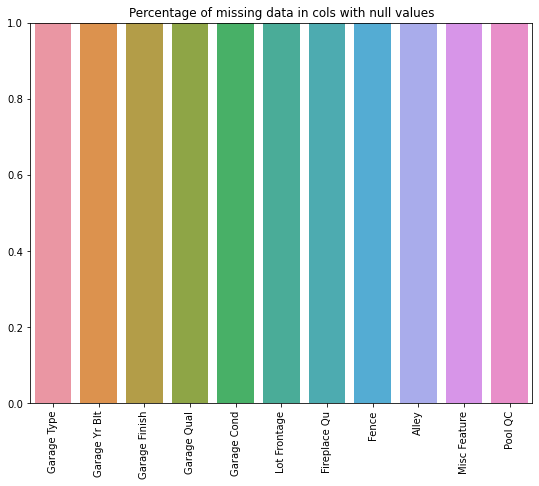

In [65]:
# Let's visualize it
plt.figure(figsize=(9,7))
sns.barplot(y=percent_nan.values, x=percent_nan.index)
plt.title('Percentage of missing data in cols with null values')
plt.xticks(rotation=90)
plt.ylim(0,1); # setting the y axis only upto 1% to see the features missing only 1% of the data 

### Therefore we have solved the problem of missing data below 1%

## Now for the data features missing more than 5% of data are there.

#### We could start dealing with these garbage values by dropping them, but they are above one percent threshold and we cannot drop that many rows of data. So we'll have to start figuring out how to fill in those values or if we can drop a column cause the Pool QC has 97% missing data meaning most houses don't have pools so can we drop them? 

# 3.Dealing with Missing Data : Part 3 - Fixing data based on Columns

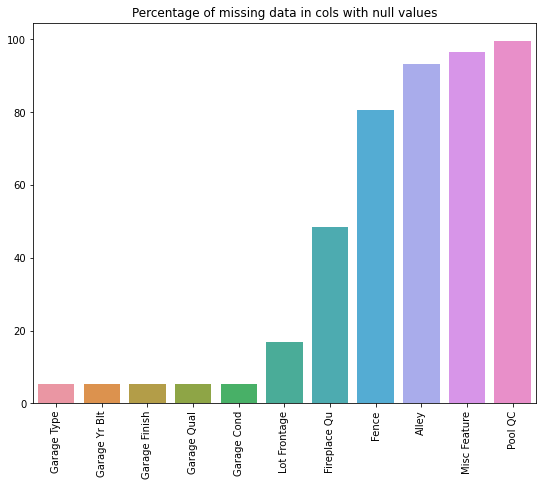

In [66]:
# Let's visualize it
plt.figure(figsize=(9,7))
sns.barplot(y=percent_nan.values, x=percent_nan.index)
plt.title('Percentage of missing data in cols with null values')
plt.xticks(rotation=90);

Just like the previous data where saw we had Basement category , here we have data that has Garage category.

Again in garage category we have all the features related to it having sam epercentage of missing data

we will assumne that for these missing data that there was actuallly no Gaage present so in that case all those garage related missing data will also become None since they are string type 

In [67]:
garage_str_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[garage_str_cols] = df[garage_str_cols].fillna('None')

df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [68]:
# We can again calculate the percentage
percent_nan = percent_missing(df)
percent_nan

Lot Frontage    16.752137
Fireplace Qu    48.547009
Fence           80.478632
Alley           93.230769
Misc Feature    96.410256
Pool QC         99.589744
dtype: float64

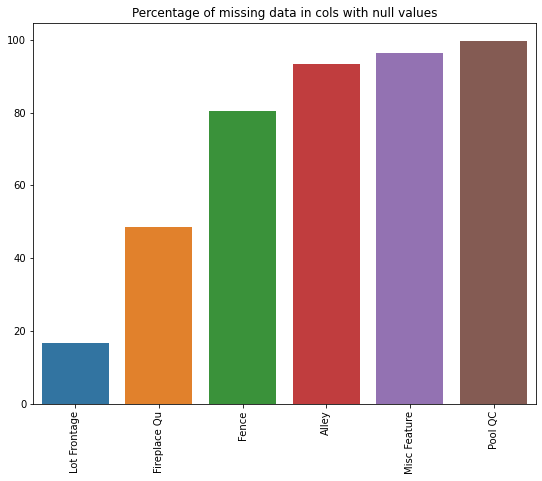

In [69]:
# Let's visualize it
plt.figure(figsize=(9,7))
sns.barplot(y=percent_nan.values, x=percent_nan.index)
plt.title('Percentage of missing data in cols with null values')
plt.xticks(rotation=90);

In [70]:
### We now just few more columns to deal with for missing values

### So at this point we can make a decision to just drop of the last 4 columns because they have upto 80% of data asmissing  

In [71]:
drop_cols = ['Fence','Alley','Misc Feature','Pool QC']

df.drop(drop_cols,axis=1,inplace=True)

In [73]:
# We can again calculate the percentage
percent_nan = percent_missing(df)
percent_nan

Lot Frontage    16.752137
Fireplace Qu    48.547009
dtype: float64

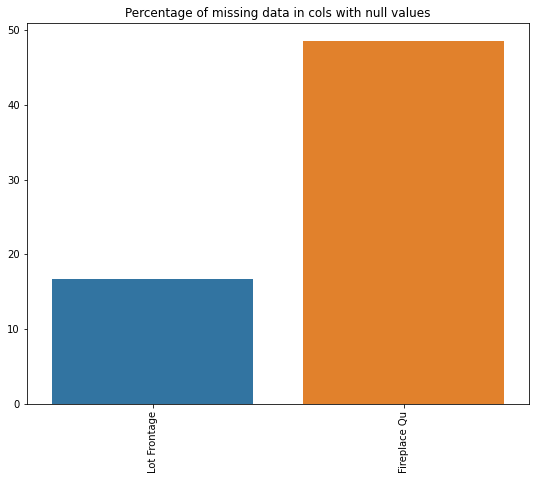

In [74]:
# Let's visualize it
plt.figure(figsize=(9,7))
sns.barplot(y=percent_nan.values, x=percent_nan.index)
plt.title('Percentage of missing data in cols with null values')
plt.xticks(rotation=90);

#### Now we have dealt with most of the missing data, we are only left with these two values for which we'll be have to very careful while filling them in because they are not missing little data that we can remove the rows and also they are missing most of the data that we can simply drop the entire column.

In [75]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [76]:
# Since Fireplace Qu is categorical dat awe will just fill in those values using Nons

df['Fireplace Qu'].fillna('None',inplace=True)

In [82]:
# Now we are only left with Lot frontage 
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,228000
2894,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,250000
2895,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Normal,202000
2909,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,146500


In [83]:
df['Lot Frontage'].head()

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [84]:
# We can se ethat this is a numerical columns so we cant set it to None neither we can drop it

#### We have to use a statistical estimation to fill in the missing values.

## Imputation of Missing Data
To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:-

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

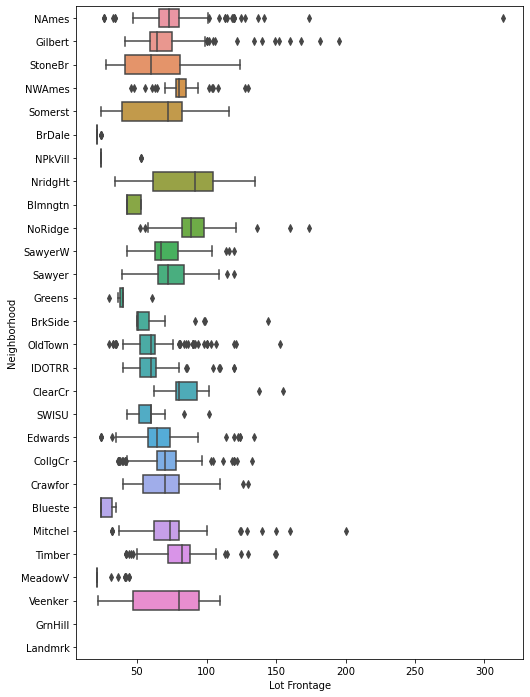

In [85]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h');

### So in this case we are asuming that if we are missing a lot frontage value then we will use the Neighbourhood values to fill in the average for the Lot frontage fo rthat neighbourhood

In [88]:
# We will use a groupby to do that
df.groupby('Neighborhood').mean()['Lot Frontage']

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

#### So what we are essentially saying is by neighbourhood if a row is missing the Lot frontage value then we will fill in the mean value of Lot Frontage of that neighborhood for the missing values.

In [89]:
# Now we can do this by transforming the column using pandas transform

In [94]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

#### So the baove line is aying that go through the entire dataframe and if you have a missing value for Lot Frontage fill in it's value with the mean groupby of neighborhood

# So finally we have dealt with all the null values in the dataset

In [95]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

#### We still have 3 rows with null value for Lot frontage, this is because some neighborhood does not have Lot frontage like GreenHill and Landmark

In [97]:
df.groupby('Neighborhood').mean()['Lot Frontage']

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [98]:
# We will just go ahead and fill 0 in those rows for Lot Frontage
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [99]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [100]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

## Hence Finally we have no null or missing data in our dataset

# Let's now deal with categorical Data 